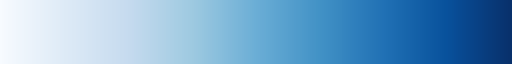

In [57]:
import sys
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from IPython.display import display, Markdown

# Set up plotting style
sys.path.append(os.path.abspath('../../'))
sns.color_palette("Blues", as_cmap=True)

In [ ]:
log_dir = os.path.join("..", "..", "logs","vit_sweep")
if not os.path.exists(log_dir):
    print(f"Folder '{log_dir}' does not exist.")
else:
    run_dirs = sorted(glob(os.path.join(log_dir, 'run_*')),
                      key=lambda x: int(os.path.basename(x).split('_')[1]))
    print(f"Found {len(run_dirs)} runs.")

Found 50 runs.


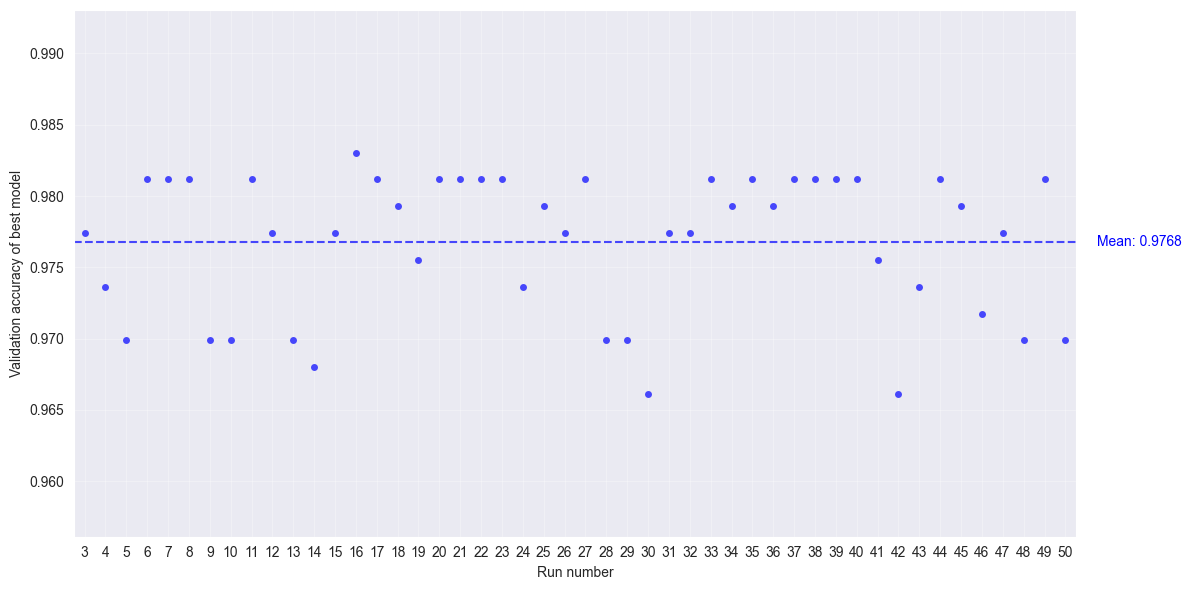


Statistical Summary of Max Validation Accuracies:
count    48.000000
mean      0.976773
std       0.004980
min       0.966102
25%       0.973164
50%       0.978343
75%       0.981168
max       0.983051
Name: Max Validation Accuracy, dtype: float64


<Figure size 640x480 with 0 Axes>

In [ ]:
max_accuracies = []

for run_dir in run_dirs:
    val_csv = os.path.join(run_dir, 'validation_metrics.csv')
    if os.path.exists(val_csv):
        df = pd.read_csv(val_csv)
        max_acc = df['acc/val'].max()
        run_num = os.path.basename(run_dir).split('_')[1]
        max_accuracies.append((int(run_num), max_acc))

results = pd.DataFrame(max_accuracies, columns=['Run', 'Max Validation Accuracy'])

plt.figure(figsize=(12, 6))
sns.stripplot(data=results, x='Run', y='Max Validation Accuracy',
              size=5, jitter=0.2, alpha=0.7, color='blue')

mean_acc = results['Max Validation Accuracy'].mean()
plt.axhline(mean_acc, color='blue', linestyle='--', alpha=0.7)
plt.text(x=len(results)+0.5, y=mean_acc,
         s=f'Mean: {mean_acc:.4f}',
         va='center', ha='left', color='blue')

plt.xlabel('Run number')
plt.ylabel('Validation accuracy of best model')
plt.ylim(results['Max Validation Accuracy'].min() - 0.01,
         results['Max Validation Accuracy'].max() + 0.01)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

if not os.path.exists('charts/binary'):
    os.makedirs('charts/binary')

plt.savefig('charts/binary/sweep_acc.png')
print("\nStatistical Summary of Max Validation Accuracies:")
print(results['Max Validation Accuracy'].describe())

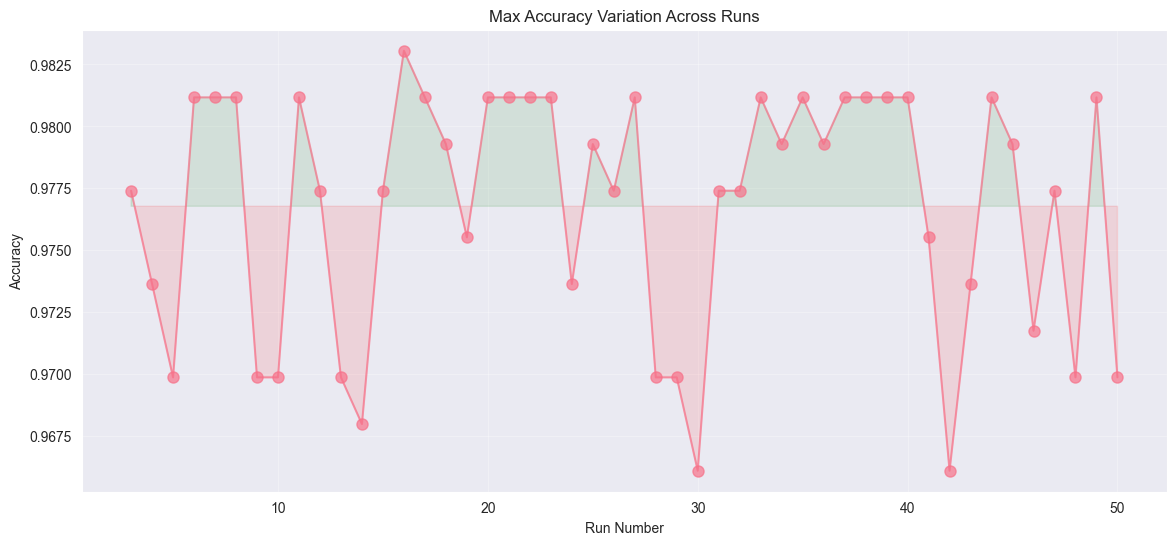

In [55]:
plt.figure(figsize=(14, 6))
plt.plot(results['Run'], results['Max Validation Accuracy'],
         'o-', alpha=0.7, markersize=8)
plt.fill_between(results['Run'],
                 results['Max Validation Accuracy'],
                 mean_acc,
                 where=results['Max Validation Accuracy']>mean_acc,
                 interpolate=True, color='green', alpha=0.1)
plt.fill_between(results['Run'],
                 results['Max Validation Accuracy'],
                 mean_acc,
                 where=results['Max Validation Accuracy']<mean_acc,
                 interpolate=True, color='red', alpha=0.1)
plt.title('Max Accuracy Variation Across Runs')
plt.xlabel('Run Number')
plt.ylabel('Accuracy')
plt.grid(alpha=0.3)
plt.show()